# Toy Problem: Kenyan Supermarkets Data

## Data Handling

In [1]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the data
sp = pd.read_excel('Supermarket Data.xlsx')


In [3]:
sp.shape

(1464, 27)

In [4]:
#check top
sp.head()

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,acacia,1,1,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
1,acacia,1,1,90.0,500.0,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
2,acacia,3,1,270.0,300.0,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
3,acacia,3,1,137.0,200.0,63.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
4,acacia,1,1,75.0,80.0,5.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31:00,afternoon,small,saika,mid,saturday,weekend,no,20,5,2017.0


In [5]:
#check tail
sp.tail()

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
1459,tuskys,4,3,1810.0,2000.0,190.0,cash,no,yes,no,yes,yes,no,no,2017-06-15 00:00:00,yes,11:28:00,morning,chain,greenspan,mid,Thursday,weekday,no,15,6,2017.0
1460,nakumatt,2,3,516.0,516.0,0.0,card,yes,no,yes,no,yes,no,no,2017-07-17 00:00:00,yes,21:00:00,night,chain,junction,mid,Monday,weekday,no,17,7,2017.0
1461,tuskys,2,1,290.0,500.0,210.0,cash,yes,no,no,no,no,no,no,2017-06-30 00:00:00,no,21:09:00,night,chain,cbd,mid,Sunday,weekend,no,30,6,2017.0
1462,tuskys,5,2,596.0,1000.0,404.0,cash,yes,no,no,yes,no,no,no,2017-05-08 00:00:00,yes,11:00:00,morning,chain,greenspan,mid,Monday,weekday,no,8,5,2017.0
1463,Eastmatt,2,2,120.0,2000.0,1880.0,cash,yes,yes,no,no,no,no,no,2017-06-23 00:00:00,no,16:51:00,evening,chain,cbd,mid,Friday,weekday,no,23,6,2017.0


In [6]:
#checking info
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   supermarket   1463 non-null   object 
 1   no_of_items   1464 non-null   int64  
 2   variation     1464 non-null   int64  
 3   total         1464 non-null   float64
 4   paid          1464 non-null   float64
 5   change        1464 non-null   float64
 6   type          1464 non-null   object 
 7   food          1464 non-null   object 
 8   snack         1464 non-null   object 
 9   beverage      1464 non-null   object 
 10  consumables   1464 non-null   object 
 11  high_end      1464 non-null   object 
 12  asset         1464 non-null   object 
 13  fixed_asset   1464 non-null   object 
 14  date          1464 non-null   object 
 15  mall          1464 non-null   object 
 16  time          1464 non-null   object 
 17  time_type     1464 non-null   object 
 18  type_market   1464 non-null 

In [7]:
sp.head(2)

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,acacia,1,1,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
1,acacia,1,1,90.0,500.0,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0


In [8]:
#validity of data (drop columns)
sp.drop(sp.columns[[4,5,12,13,20,21,22,23,24,25,26]], axis=1, inplace=True)
sp


,supermarket,no_of_items,variation,total,type,food,snack,beverage,consumables,high_end,date,mall,time,time_type,type_market,location
0,acacia,1,1,90.0,cash,yes,no,no,no,no,20/05/2017,no,19:33:00,night,small,saika
1,acacia,1,1,90.0,cash,yes,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika
2,acacia,3,1,270.0,cash,yes,no,no,no,no,20/05/2017,no,19:16:00,night,small,saika
3,acacia,3,1,137.0,cash,yes,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika
4,acacia,1,1,75.0,cash,yes,no,no,no,no,20/05/2017,no,18:31:00,afternoon,small,saika
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,tuskys,4,3,1810.0,cash,no,yes,no,yes,yes,2017-06-15 00:00:00,yes,11:28:00,morning,chain,greenspan
1460,nakumatt,2,3,516.0,card,yes,no,yes,no,yes,2017-07-17 00:00:00,yes,21:00:00,night,chain,junction
1461,tuskys,2,1,290.0,cash,yes,no,no,no,no,2017-06-30 00:00:00,no,21:09:00,night,chain,cbd
1462,tuskys,5,2,596.0,cash,yes,no,no,yes,no,2017-05-08 00:00:00,yes,11:00:00,morning,chain,greenspan


In [9]:
#check nulls
sp.isnull().any()

supermarket     True
no_of_items    False
variation      False
total          False
type           False
food           False
snack          False
beverage       False
consumables    False
high_end       False
date           False
mall           False
time           False
time_type      False
type_market    False
location       False
dtype: bool

In [10]:
sp.isnull().values.sum()

1

In [11]:
#dealing with nulls
sp.dropna(axis=0, how='any', inplace=True)

In [12]:
sp.shape

(1463, 16)

In [13]:
#making all text lowercase in supermarket
sp.supermarket.apply(lambda x: x.lower())

0         acacia
1         acacia
2         acacia
3         acacia
4         acacia
          ...   
1459      tuskys
1460    nakumatt
1461      tuskys
1462      tuskys
1463    eastmatt
Name: supermarket, Length: 1463, dtype: object

In [14]:
#trying to convert date
sp['date'] = pd.to_datetime(sp.date, errors='coerce')


sp['date'] = sp['date'].dt.strftime('%Y-%m-%d %H:%M')

In [15]:
#sp['date'] = sp['date'].replace(['17?06/2017'], '17/06/2017')
#sp['date'] = sp['date'].replace(['201-05-23 00:00:00'], '2017-05-23 00:00:00')
#sp['date'] = sp['date'].replace(['201-05-23 00:00:00'], '2017-05-23')


In [16]:
#set date as index
sp.set_index(sp.date, drop=True,inplace=True)
sp.tail()

#convert the index to datetimeIndex
sp.index = pd.to_datetime(sp.index)


In [17]:
#drop date column
sp.drop('date', axis=1, inplace=True)
sp.tail()

,supermarket,no_of_items,variation,total,type,food,snack,beverage,consumables,high_end,mall,time,time_type,type_market,location
date,,,,,,,,,,,,,,,
2017-06-15,tuskys,4,3,1810.0,cash,no,yes,no,yes,yes,yes,11:28:00,morning,chain,greenspan
2017-07-17,nakumatt,2,3,516.0,card,yes,no,yes,no,yes,yes,21:00:00,night,chain,junction
2017-06-30,tuskys,2,1,290.0,cash,yes,no,no,no,no,no,21:09:00,night,chain,cbd
2017-05-08,tuskys,5,2,596.0,cash,yes,no,no,yes,no,yes,11:00:00,morning,chain,greenspan
2017-06-23,Eastmatt,2,2,120.0,cash,yes,yes,no,no,no,no,16:51:00,evening,chain,cbd


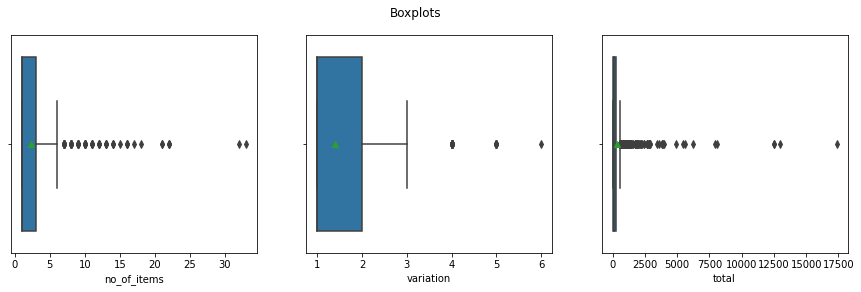

In [18]:
# Checking for Outliers & Anomalies
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(15, 4))
fig.suptitle('Boxplots')
sns.boxplot(x = sp['no_of_items'], ax=ax1, showmeans = True)
sns.boxplot(x = sp['variation'], ax=ax2, showmeans = True)
sns.boxplot(x = sp['total'], ax=ax3, showmeans = True)
plt.show()

## Univariate Analysis

In [19]:
#overall stats of the data
sp.describe()

,no_of_items,variation,total
count,1463.000000,1463.000000,1463.000000
mean,2.309638,1.398496,311.952946
std,2.648430,0.731674,924.367898
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,60.000000
50%,1.000000,1.000000,110.000000
75%,3.000000,2.000000,250.000000
max,33.000000,6.000000,17350.000000


In [20]:
#unique values per column
for column in sp: 
     
    # Select column contents by column    
    # name using [] operator 
    columnSeriesObj = sp[column].nunique() 
    print('Colunm Name : ', column) 
    print('No. of unique items in Column: ', columnSeriesObj) 

Colunm Name :  supermarket
No. of unique items in Column:  24
Colunm Name :  no_of_items
No. of unique items in Column:  22
Colunm Name :  variation
No. of unique items in Column:  6
Colunm Name :  total
No. of unique items in Column:  426
Colunm Name :  type
No. of unique items in Column:  7
Colunm Name :  food
No. of unique items in Column:  2
Colunm Name :  snack
No. of unique items in Column:  2
Colunm Name :  beverage
No. of unique items in Column:  2
Colunm Name :  consumables
No. of unique items in Column:  2
Colunm Name :  high_end
No. of unique items in Column:  2
Colunm Name :  mall
No. of unique items in Column:  2
Colunm Name :  time
No. of unique items in Column:  688
Colunm Name :  time_type
No. of unique items in Column:  5
Colunm Name :  type_market
No. of unique items in Column:  3
Colunm Name :  location
No. of unique items in Column:  30


In [21]:
#Measures of central tendency and dispersion
#no of items
print(f'Min: {sp.no_of_items.min()}')
print(f'Q1: {sp.no_of_items.quantile(.25)}')
print(f'Q2: {sp.no_of_items.quantile(.50)}')
print(f'Q3: {sp.no_of_items.quantile(.75)}')
print(f'Max: {sp.no_of_items.max()}')
print('*'*15)

print(f'Mean: {sp.no_of_items.mean()}')
print(f'Median: {sp.no_of_items.median()}')
print(f'Mode: {sp.no_of_items.mode().values[0]}')
print('*'*15)

print(f'Skew: {sp.no_of_items.skew()}')
print(f'Kurtosis: {sp.no_of_items.kurt()}')



Min: 1
Q1: 1.0
Q2: 1.0
Q3: 3.0
Max: 33
***************
Mean: 2.3096377306903624
Median: 1.0
Mode: 1
***************
Skew: 4.960648535773933
Kurtosis: 36.64844293425158


In [22]:
#Measures of central tendency and dispersion
#variation
print(f'Min: {sp.variation.min()}')
print(f'Q1: {sp.variation.quantile(.25)}')
print(f'Q2: {sp.variation.quantile(.50)}')
print(f'Q3: {sp.variation.quantile(.75)}')
print(f'Max: {sp.variation.max()}')
print('*'*15)

print(f'Mean: {sp.variation.mean()}')
print(f'Median: {sp.variation.median()}')
print(f'Mode: {sp.variation.mode().values[0]}')
print('*'*15)

print(f'Skew: {sp.variation.skew()}')
print(f'Kurtosis: {sp.variation.kurt()}')

Min: 1
Q1: 1.0
Q2: 1.0
Q3: 2.0
Max: 6
***************
Mean: 1.3984962406015038
Median: 1.0
Mode: 1
***************
Skew: 2.180066281840615
Kurtosis: 5.498991046424874


In [23]:
sp.head(1)

,supermarket,no_of_items,variation,total,type,food,snack,beverage,consumables,high_end,mall,time,time_type,type_market,location
date,,,,,,,,,,,,,,,
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:33:00,night,small,saika


In [24]:
#Measures of central tendency and dispersion
#total (money spent)
print(f'Min: {sp.total.min()}')
print(f'Q1: {sp.total.quantile(.25)}')
print(f'Q2: {sp.total.quantile(.50)}')
print(f'Q3: {sp.total.quantile(.75)}')
print(f'Max: {sp.total.max()}')
print('*'*15)

print(f'Mean: {sp.total.mean()}')
print(f'Median: {sp.total.median()}')
print(f'Mode: {sp.total.mode().values[0]}')
print('*'*15)

print(f'Skew: {sp.total.skew()}')
print(f'Kurtosis: {sp.total.kurt()}')

Min: 1.0
Q1: 60.0
Q2: 110.0
Q3: 250.0
Max: 17350.0
***************
Mean: 311.952946001367
Median: 110.0
Mode: 60.0
***************
Skew: 10.912011137269673
Kurtosis: 152.81896184157688


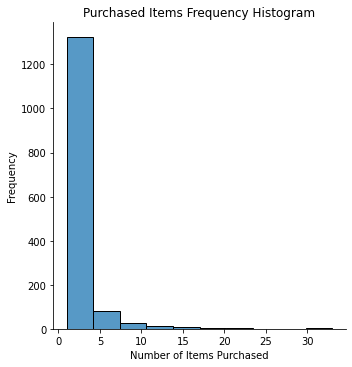

In [25]:
#Visual look at the no of items data
sns.displot(sp['no_of_items'], kind='hist',bins=10, kde=False)
plt.ylabel("Frequency")
plt.xlabel("Number of Items Purchased")
plt.title("Purchased Items Frequency Histogram")
plt.show()

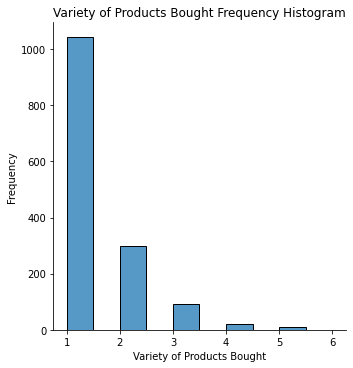

In [26]:
#Visual look at the variation data
sns.displot(sp['variation'], kind='hist',bins=10, kde=False)
plt.ylabel("Frequency")
plt.xlabel("Variety of Products Bought")
plt.title("Variety of Products Bought Frequency Histogram")
plt.show()

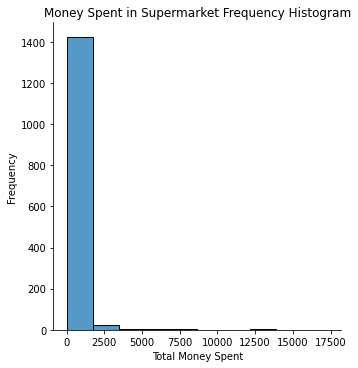

In [27]:
#Visual look at the total money spent data
sns.displot(sp['total'], kind='hist',bins=10, kde=False)
plt.ylabel("Frequency")
plt.xlabel("Total Money Spent")
plt.title("Money Spent in Supermarket Frequency Histogram")
plt.show()

## Bivariate Analysis

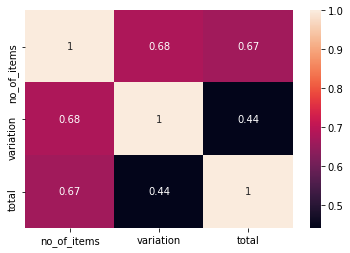

In [28]:
# Ploting the bivariate summaries and recording our observations
#Numerical to Numerical:Correlation
#checking correlations
sns.heatmap(sp.corr(),annot=True)
plt.show()

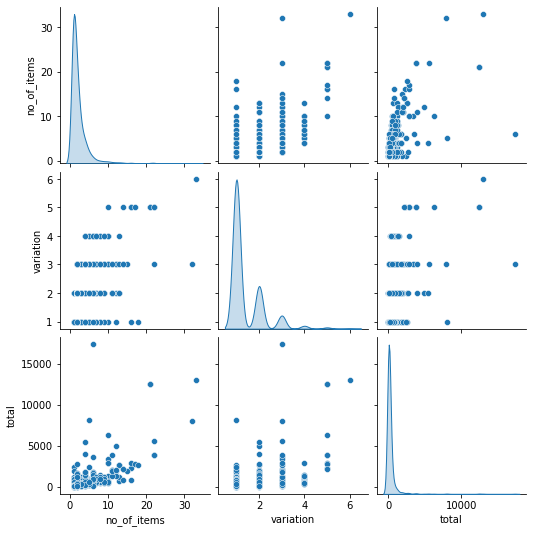

In [29]:
#Pair plot(summary of relationships)
sns.pairplot(sp, diag_kind='kde')
plt.show()

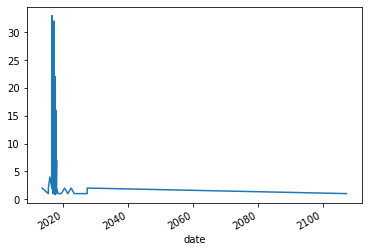

In [30]:
#plotting trends
sp['no_of_items'].plot()

In [31]:
#due to the out of bounds dates, we subset the data to only 2017
spc = sp.loc['2017']
spc

,supermarket,no_of_items,variation,total,type,food,snack,beverage,consumables,high_end,mall,time,time_type,type_market,location
date,,,,,,,,,,,,,,,
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:33:00,night,small,saika
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:12:00,night,small,saika
2017-05-20,acacia,3,1,270.0,cash,yes,no,no,no,no,no,19:16:00,night,small,saika
2017-05-20,acacia,3,1,137.0,cash,yes,no,no,no,no,no,19:12:00,night,small,saika
2017-05-20,acacia,1,1,75.0,cash,yes,no,no,no,no,no,18:31:00,afternoon,small,saika
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-15,tuskys,4,3,1810.0,cash,no,yes,no,yes,yes,yes,11:28:00,morning,chain,greenspan
2017-07-17,nakumatt,2,3,516.0,card,yes,no,yes,no,yes,yes,21:00:00,night,chain,junction
2017-06-30,tuskys,2,1,290.0,cash,yes,no,no,no,no,no,21:09:00,night,chain,cbd


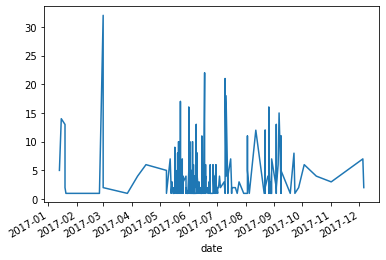

In [32]:
#plotting trends
spc['no_of_items'].plot()

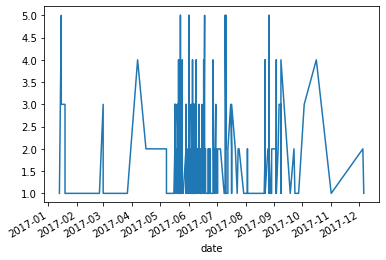

In [33]:
#plotting trends
spc['variation'].plot()

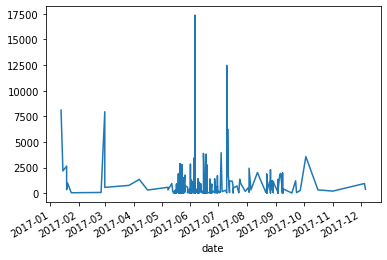

In [34]:
#plotting trends
spc['total'].plot()

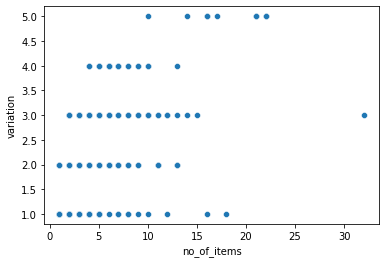

In [35]:
#scatter plot variation and number of items
sns.scatterplot(x= spc['no_of_items'], y= spc['variation'])
plt.show()

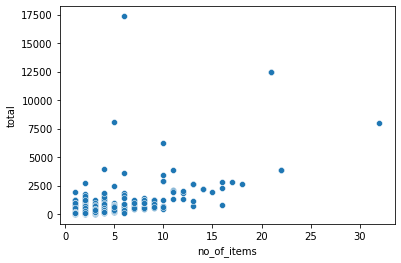

In [36]:
#scatter plot total and number of items
sns.scatterplot(x= spc['no_of_items'], y= spc['total'])
plt.show()

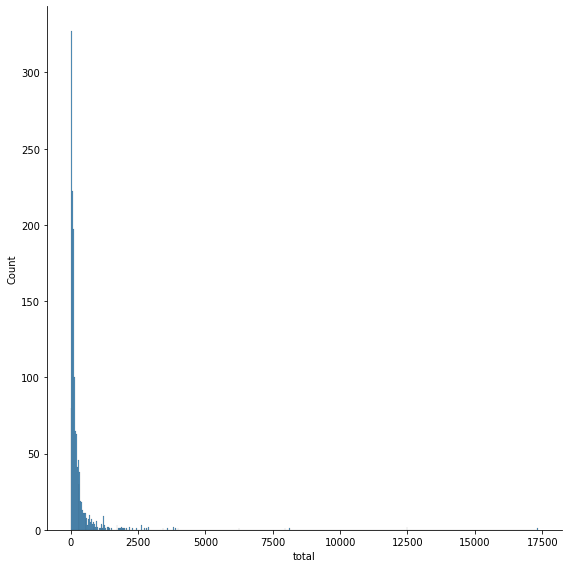

In [37]:
#histogram to view the subset data for 2017
sns.displot(x = spc['total'], height=8 )
plt.show()

In [38]:
#export the cleaned data

spc.to_csv(r'Kenya_Supermarkets.csv')

## Linear Discriminant Analysis

In [ ]:
spc.head(2)

,supermarket,no_of_items,variation,total,type,food,snack,beverage,consumables,high_end,mall,time,time_type,type_market,location
date,,,,,,,,,,,,,,,
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:33:00,night,small,saika
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:12:00,night,small,saika


In [ ]:
spc.location.unique()

array(['saika', 'yaya', 'kilimani', 'donholm', 'umoja', 'cbd', 'eldoret',
       'mwiki', 'nairobi west', 'langata', 'Kitengela', 'ongata rongai',
       'junction', 'kangundo road', 'karen', 'komarock', 'prestige',
       'adlife', 'karasha', 'greenspan', 'eastlands', 'ruaraka', 'mega',
       'Donholm', 'gami', 'kiambu', 'kericho town', 'adams'], dtype=object)

In [ ]:
spc.shape

(1432, 15)

In [ ]:
# create the lda model
model = LinearDiscriminantAnalysis()

In [ ]:
spc.head(2)

,supermarket,no_of_items,variation,total,type,food,snack,beverage,consumables,high_end,mall,time,time_type,type_market,location
date,,,,,,,,,,,,,,,
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:33:00,night,small,saika
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:12:00,night,small,saika


In [ ]:
#convert text data into numerical (encode)
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None  # default='warn'
en = LabelEncoder()
spc['supermarket'] = en.fit_transform(spc['supermarket'])
spc['type'] = en.fit_transform(spc['type'])
spc['food'] = en.fit_transform(spc['food'])
spc['high_end'] = en.fit_transform(spc['high_end'])
spc['mall'] = en.fit_transform(spc['mall'])
spc['time_type'] = en.fit_transform(spc['time_type'])
spc['type_market'] = en.fit_transform(spc['type_market'])
spc['location'] = en.fit_transform(spc['location'])

spc.head()


,supermarket,no_of_items,variation,total,type,food,snack,beverage,consumables,high_end,mall,time,time_type,type_market,location
date,,,,,,,,,,,,,,,
2017-05-20,4,1,1,90.0,1,1,no,no,no,0,0,19:33:00,4,2,25
2017-05-20,4,1,1,90.0,1,1,no,no,no,0,0,19:12:00,4,2,25
2017-05-20,4,3,1,270.0,1,1,no,no,no,0,0,19:16:00,4,2,25
2017-05-20,4,3,1,137.0,1,1,no,no,no,0,0,19:12:00,4,2,25
2017-05-20,4,1,1,75.0,1,1,no,no,no,0,0,18:31:00,0,2,25


In [ ]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#features (cols)
cols = spc.drop(['snack','beverage','consumables','time'], axis=1)
target = spc['food']

#standardise the data
xxx
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#initialise it
lda = LDA()

lda_= lda.fit(cols, target)
lda_feat = lda_.transform(cols)

#show co-efficients of the columns
lda_.coef_

array([[-2.40538601e-02,  1.87022517e-01,  5.71328805e-01,
        -1.57231803e-04, -1.11370586e-01,  9.36963528e-17,
        -1.26152691e+00,  2.66637455e-01,  2.21873815e-01,
        -8.05877952e-02,  3.32164294e-02]])

In [ ]:
#creating a df to store the features that have highest co-efficients
feat_matters = pd.DataFrame(index=cols.columns.values, data = lda_.coef_[0].T)
feat_matters.sort_values(0, ascending =False)

,0
variation,5.713288e-01
mall,2.666375e-01
time_type,2.218738e-01
no_of_items,1.870225e-01
location,3.321643e-02
food,9.369635e-17
total,-1.572318e-04
supermarket,-2.405386e-02
type_market,-8.058780e-02
type,-1.113706e-01


# Hypothesis Test

## Test

Ho: Average money spent in chain stores to buy food >= Average money spent in small stores to buy food

Ha: Average money spent in chain stores to buy food < Average money spent in small stores to buy food

## Sampling

In [39]:
spc.head()

,supermarket,no_of_items,variation,total,type,food,snack,beverage,consumables,high_end,mall,time,time_type,type_market,location
date,,,,,,,,,,,,,,,
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:33:00,night,small,saika
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:12:00,night,small,saika
2017-05-20,acacia,3,1,270.0,cash,yes,no,no,no,no,no,19:16:00,night,small,saika
2017-05-20,acacia,3,1,137.0,cash,yes,no,no,no,no,no,19:12:00,night,small,saika
2017-05-20,acacia,1,1,75.0,cash,yes,no,no,no,no,no,18:31:00,afternoon,small,saika


In [40]:
spc['type_market'].unique()

array(['small', 'median', 'chain'], dtype=object)

Sample the Small and Chain types to test a hypothesis in proportion to the count.

In [45]:
spc['type_market'].value_counts()

chain     1265
small      130
median      37
Name: type_market, dtype: int64

In [74]:
#making the data chain and small only
spc = spc[(spc['type_market'] == 'chain') | (spc['type_market'] == 'small')]
spc = spc[spc['food'] == 'yes']
spc

,supermarket,no_of_items,variation,total,type,food,snack,beverage,consumables,high_end,mall,time,time_type,type_market,location
date,,,,,,,,,,,,,,,
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:33:00,night,small,saika
2017-05-20,acacia,1,1,90.0,cash,yes,no,no,no,no,no,19:12:00,night,small,saika
2017-05-20,acacia,3,1,270.0,cash,yes,no,no,no,no,no,19:16:00,night,small,saika
2017-05-20,acacia,3,1,137.0,cash,yes,no,no,no,no,no,19:12:00,night,small,saika
2017-05-20,acacia,1,1,75.0,cash,yes,no,no,no,no,no,18:31:00,afternoon,small,saika
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-15,tuskys,1,1,90.0,cash,yes,no,no,no,no,yes,20:02:00,night,chain,greenspan
2017-07-17,nakumatt,2,3,516.0,card,yes,no,yes,no,yes,yes,21:00:00,night,chain,junction
2017-06-30,tuskys,2,1,290.0,cash,yes,no,no,no,no,no,21:09:00,night,chain,cbd


In [75]:
spc['type_market'].value_counts()

chain    627
small     60
Name: type_market, dtype: int64

In [76]:
# Using the Stratified technique we want to split the dataset in such a way that 70% of our dataset will be train set and 30% will be test set. 
#Furthermore, the proportion of chain and small stores will be maintained as in the original data.

# Stratified market type sample
spc_strat_datset = spc.groupby('type_market', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.7))

# preview the stratified train dataset
spc_strat_datset.head()



,supermarket,no_of_items,variation,total,type,food,snack,beverage,consumables,high_end,mall,time,time_type,type_market,location
date,,,,,,,,,,,,,,,
2017-05-23,karrymart,3,1,225.0,cash,yes,yes,yes,no,no,no,18:01:00,evening,chain,cbd
2017-09-03,cleanshelf,2,1,330.0,cash,yes,no,no,no,no,no,17:32:00,evening,chain,ongata rongai
2017-05-23,karrymart,1,1,126.0,cash,yes,no,no,yes,no,no,06:05:00,morning,chain,cbd
2017-05-21,tuskys,3,1,357.0,cash,yes,no,no,no,no,no,10:07:00,morning,chain,cbd
2017-09-08,tumaini,5,3,235.0,cash,yes,yes,no,no,no,no,17:20:00,evening,chain,ongata rongai


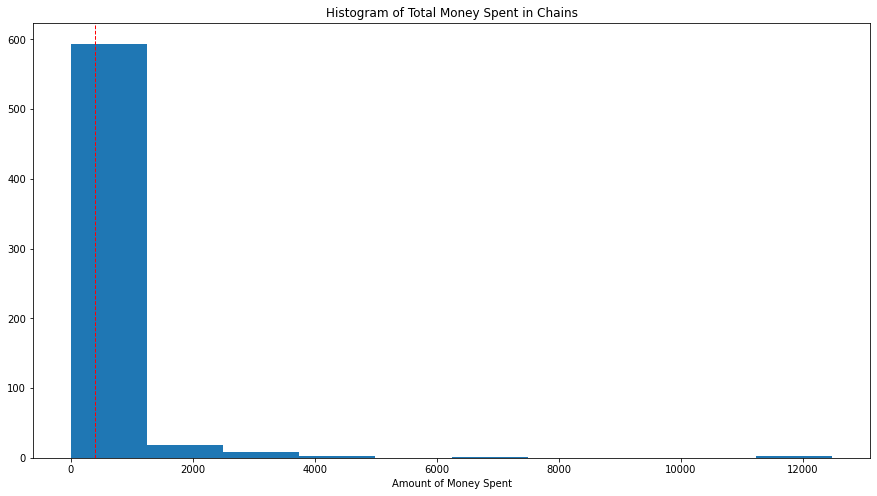

In [77]:
#checking the distributions:
#chain:
spc_c = spc[spc['type_market'] == 'chain']
plt.figure(figsize=(15,8))
plt.hist(spc_c['total'])
plt.axvline(spc_c.total.mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('Histogram of Total Money Spent in Chains')
plt.xlabel('Amount of Money Spent')
plt.show()

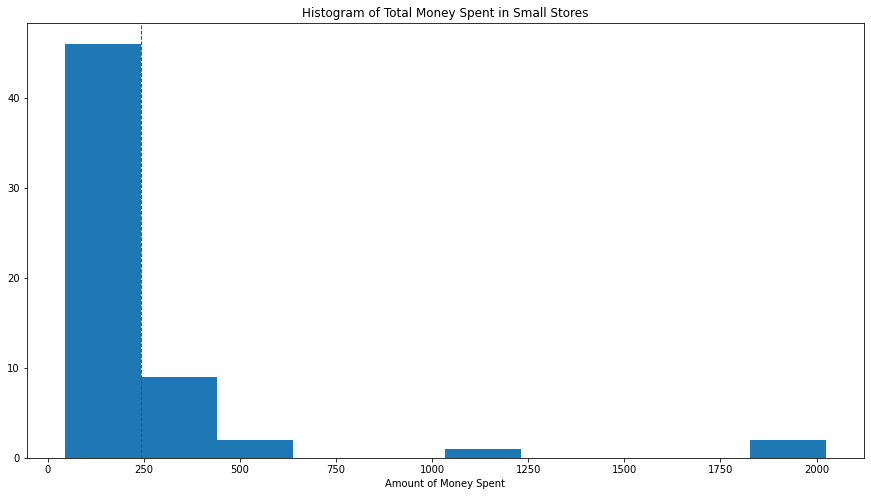

In [78]:
#checking the distributions:
#small:

spc_s = spc[spc['type_market'] == 'small']
plt.figure(figsize=(15,8))
plt.hist(spc_s['total'])
plt.axvline(spc_s.total.mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('Histogram of Total Money Spent in Small Stores')
plt.xlabel('Amount of Money Spent')
plt.show()

In [80]:
#Carrying out the one-tailed Z test:

from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(spc_c['total'], x2=spc_s['total'], value=0,alternative= 'smaller')
print(float(pval))

#setting the significance level of 0.05
alpha = 0.05 
if pval < alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.8997928632415659
accept null hypothesis


Given the results its clear that we do not have enough evidence to reject the null hypothesis. The reason for the very high p-value can point to lack of sufficient information to start with (scope of the information may be limited and thus biased before carrying out the test). Therefore, as per the information we have at hand the average amount of money spent to buy food in chain stores is much greater than that spent in small stores.